In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

In [2]:
df = pd.read_csv("Classified Data",index_col=0)  #loaded csv and made first column, the index
df.head()
# 'TARGET CLASS' is our outcome or Y

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ,TARGET CLASS
0,0.913917,1.162073,0.567946,0.755464,0.780862,0.352608,0.759697,0.643798,0.879422,1.231409,1
1,0.635632,1.003722,0.535342,0.825645,0.924109,0.648450,0.675334,1.013546,0.621552,1.492702,0
2,0.721360,1.201493,0.921990,0.855595,1.526629,0.720781,1.626351,1.154483,0.957877,1.285597,0
3,1.234204,1.386726,0.653046,0.825624,1.142504,0.875128,1.409708,1.380003,1.522692,1.153093,1
4,1.279491,0.949750,0.627280,0.668976,1.232537,0.703727,1.115596,0.646691,1.463812,1.419167,1


In [3]:
from sklearn.preprocessing import StandardScaler #Standardizes variables
#bringing X's in the same range makes distance calculation easier

In [4]:
scaler = StandardScaler() #Scaler object
#fit method of scaler is similar to how a model learne
#the scalers fit method learns and understands the X variable values.
#below we pass all columns as X's except the 'target class' since that is our Y
#Creates standard scaler object
scaler.fit(df.drop('TARGET CLASS',axis=1))

StandardScaler(copy=True, with_mean=True, with_std=True)

In [6]:
#Now the scaler object is trained on the X values, and we call the transform method to actually
#standardize/transform the X values. This creates scaled features object
#QUESTION: If the fit method helped the scaler learn the dataset already, why do we need to provide the dataset again for transform method
scaled_features = scaler.transform(df.drop('TARGET CLASS',axis=1))
type(scaled_features) #this is a numpy array


numpy.ndarray

In [7]:
#We grab all column names of the df dataframe above (except the last one), using df.columns[:-1] -1 to drop last
#We supply that as column list, and using the scaled features numpy array, we create the new dataframe to be used for KNN
df_feat = pd.DataFrame(scaled_features,columns=df.columns[:-1])
df_feat.head()

,WTT,PTI,EQW,SBI,LQE,QWG,FDJ,PJF,HQE,NXJ
0,-0.123542,0.185907,-0.913431,0.319629,-1.033637,-2.308375,-0.798951,-1.482368,-0.949719,-0.643314
1,-1.084836,-0.430348,-1.025313,0.625388,-0.444847,-1.152706,-1.129797,-0.202240,-1.828051,0.636759
2,-0.788702,0.339318,0.301511,0.755873,2.031693,-0.870156,2.599818,0.285707,-0.682494,-0.377850
3,0.982841,1.060193,-0.621399,0.625299,0.452820,-0.267220,1.750208,1.066491,1.241325,-1.026987
4,1.139275,-0.640392,-0.709819,-0.057175,0.822886,-0.936773,0.596782,-1.472352,1.040772,0.276510


In [8]:
# Train Test Split
from sklearn.model_selection import train_test_split

# Note that train_test_split method accepts a numpy array as well, in the form of scaled_features

X_train, X_test, y_train, y_test = train_test_split(scaled_features,df['TARGET CLASS'], test_size=0.30)

In [23]:
from sklearn.neighbors import KNeighborsClassifier
#Since we are running a Classification, we use Classifier class. There is also a KNN Regressor class
knn = KNeighborsClassifier(n_neighbors=2)  #Trying with 3 neighbor
knn.fit(X_train,y_train)  #Learning for the model using fit method
pred = knn.predict(X_test) #Generate predictions on test dataset

In [24]:
from sklearn.metrics import classification_report,confusion_matrix

In [25]:
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))

[[149  10]
 [ 18 123]]
             precision    recall  f1-score   support

          0       0.89      0.94      0.91       159
          1       0.92      0.87      0.90       141

avg / total       0.91      0.91      0.91       300



In [19]:
error_rate = []  #Elbow method to choose best K

# Will take some time. Trying for K 1 to 40
for i in range(1,40):
    
    knn = KNeighborsClassifier(n_neighbors=i)  #Run classifier for each K value
    knn.fit(X_train,y_train)  #Learn with each K value
    pred_i = knn.predict(X_test)   #Create predictions for each K value
    #np.mean operates on the array of booleans generated by pred_i != y_test
    #i.e. checking if predicted and actual values are same for each item in the set, doing this in loop
    #for sets generated by each K value.
    #So get one mean per set. This mean is the error rate. We append the error rate for each K to the array.
    error_rate.append(np.mean(pred_i != y_test))

Text(0,0.5,'Error Rate')

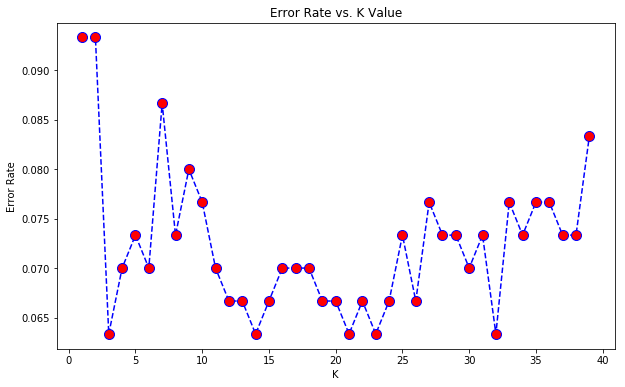

In [20]:
plt.figure(figsize=(10,6))  #set overall rectangle size
plt.plot(range(1,40),error_rate,color='blue', linestyle='dashed', marker='o',
         markerfacecolor='red', markersize=10)
plt.title('Error Rate vs. K Value')
plt.xlabel('K')
plt.ylabel('Error Rate')

In [26]:
#From plot above choose K=19 is the more stable value, if not one with smallest error rate
# FIRST A QUICK COMPARISON TO OUR ORIGINAL K=1
knn = KNeighborsClassifier(n_neighbors=19)  #Create estimator with new K

knn.fit(X_train,y_train)  #train the model
pred = knn.predict(X_test)  #run predictions

print('WITH K=19')
print('\n')
print(confusion_matrix(y_test,pred))
print('\n')
print(classification_report(y_test,pred))

WITH K=19


[[141  18]
 [  2 139]]


             precision    recall  f1-score   support

          0       0.99      0.89      0.93       159
          1       0.89      0.99      0.93       141

avg / total       0.94      0.93      0.93       300

